__a) Determine la matriz de transición de estados explicando cómo se obtiene la misma__

Se considera como unidad de tiempo los 10 milisegundos que se mencionan.
Definamos los siguientes eventos:


__A:__ _Llega una solicitud al servidor_

__P(A)=__$\frac{1}{40}$

__B:__ _Se termina de procesar una solicitud._

__P(B)=__$\frac{1}{30}$


Teniendo esto en cuenta en cada paso pueden suceder cuatro cosas:

1) Exclusivamente entra una solicitud, en ese caso tengo una solicitud mas en el servidor, la probabilidad de esto es: $P(A\cap \overline{B})$


2) Exclusivamente se termina de procesar una solicitud, en ese caso se tiene una solicitud menos en el servidor, la probabilidad de esto es: $P(\overline{A} \cap B)$


3) No pasa nada,en este caso me quedo con la misma cantidad de solicitudes que tenia antes, la probabilidad de esto es: $P(\overline{A}\cap \overline{B})$


4) Entra una solicitud nueva y se termina de procesar una solicitud, al igual que en el caso anterior, me quedo con la misma cantidad de solcitudes que tenia, la probabilidad de esto es: $P(A\cap B)$

---

#### La probabilidad de 1) es, por ser __A__ y __B__ eventos independientes: 
$P(A\cap \overline{B}) = P(A)*P(\overline{B}) = P(A)*(1-P(B)) = \frac{29}{1200}$

#### Para 2) :
$P(\overline{A}\cap B) = P(\overline{A})*P(B) = (1-P(A))*P(B) = \frac{13}{400}$

#### Para 3):
$P(\overline{A}\cap \overline{B}) = P(\overline{A})*P(\overline{B}) = (1-P(A))*(1-P(B)) = \frac{377}{400}$

#### Para 4):
$P(A\cap B) = P(A)*P(B) = \frac{1}{1200}$

---

#### El caso 1) me define la transición $P_{n,n+1}$:
Por lo que la probabilidad de ella es:
$P_{n,n+1} = P(A\cap \overline{B}) = \frac{29}{1200}$ 

#### El caso 2) me define la transición $P_{n,n-1}$:
Por lo que la probabilidad de ella es:
$P_{n,n-1} = P(\overline{A}\cap B) = \frac{13}{400}$ 

#### Ahora, los casos 3) y 4) me definen la misma transicion: _"tenia n solicitudes y en el proximo instante sigo teniendo n"_

#### Por lo que las probabilidades de la transicion $n\to n$ son:

$P_{n,n} = \frac{377}{400} + \frac{1}{1200} = \frac{283}{300}$

#### Cualquier otra transicion tiene probabilidad cero, ya que no tengo forma de por ejemplo sumar dos solicitudes en un instante o perder 3.

---

Ahora ya podemos construir la matriz:

$$
\begin{vmatrix}
P_{n,n} & P_{n,n+1} & 0 & 0 & 0 & ...\\
P_{n,n-1} & P_{n,n} & P_{n, n+1} & 0 & 0 & ...\\
0 & P_{n,n-1} & P_{n,n} & P_{n, n+1} & 0 & ...\\
0 & 0 & P_{n,n-1} & P_{n,n} & P_{n, n+1} & ...\\
0 & 0 & 0 & P_{n,n-1} & P_{n,n} & ...\\
... & ... & ... & ... & ... & ...\\
\end{vmatrix}
$$

Que, reemplazando los valores queda:

$$
\begin{vmatrix}
\frac{283}{300} & \frac{29}{1200} & 0 & 0 & 0 & ...\\
\frac{13}{400} & \frac{283}{300} & \frac{29}{1200} & 0 & 0 & ...\\
0 & \frac{13}{400} & \frac{283}{300} & \frac{29}{1200} & 0 & ...\\
0 & 0 & \frac{13}{400} & \frac{283}{300} & \frac{29}{1200} & ...\\
0 & 0 & 0 & \frac{13}{400} & \frac{283}{300} & ...\\
... & ... & ... & ... & ... & ...\\
\end{vmatrix}
$$

__b) Utilizando  Matlab,  Octave  o  Python  simule  la  evolución del  sistema  a  lo  largo  de  1.000  segundos suponiendoque  el servidor comienza sin estar procesando solicitudes__

In [1]:
%matplotlib inline

In [2]:
from random import uniform


def simular_servidor(segundos):
    unidades_de_t = segundos*100
    evolucion = [0]
    cant_actual = 0
    for i in range(unidades_de_t):
        entra_sol = uniform(0,1)
        procesa_sol = uniform(0,1)
        if procesa_sol < (1/30) and cant_actual > 0:
            cant_actual -= 1
        if entra_sol < (1/40):
            cant_actual += 1
        evolucion.append(cant_actual)
    return evolucion

__c) Realice un gráfico mostrando la cantidad de solicitudes en el servidor en cada instante de tiempo__

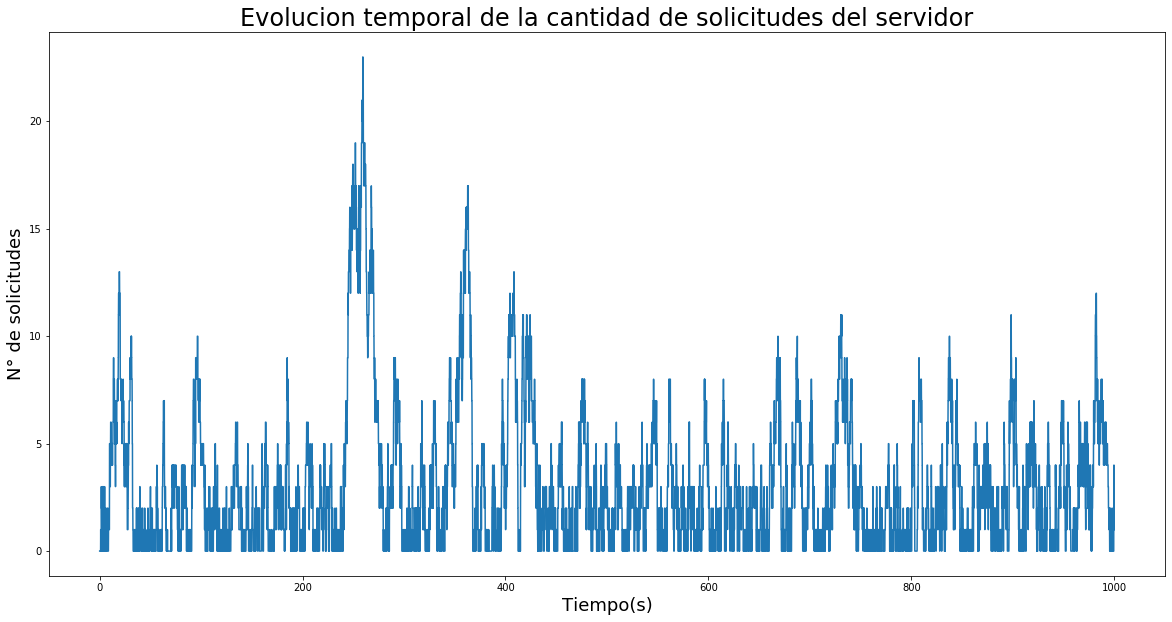

In [3]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(0, 1000, num=100001)
y = simular_servidor(1000)

plt.figure(figsize=(20, 10))
plt.plot(x,y)
plt.title("Evolucion temporal de la cantidad de solicitudes del servidor", fontsize=24)
plt.xlabel("Tiempo(s)", fontsize=18)
plt.ylabel("N° de solicitudes", fontsize=18);

__d) Realice un histograma mostrando cuantas veces el sistema estuvo en cada estado__

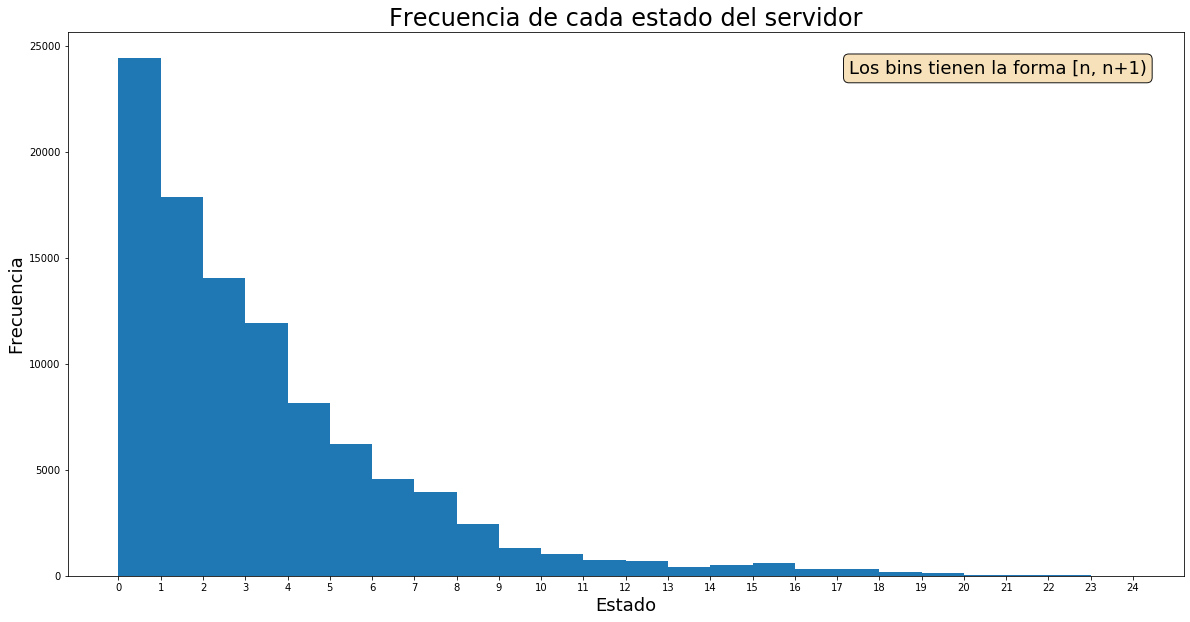

In [4]:
buckets = list(set(y))
buckets.append(buckets[-1] + 1) 
# Para que el ultimo valor de y tenga su propio bin, sino matplotlib lo junta con el anteultimo


fig, ax = plt.subplots(1,1, figsize=(20, 10))
textstr = "Los bins tienen la forma [n, n+1)"
ax.hist(y, bins=buckets)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
ax.text(0.7, 0.95, textstr, transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
plt.xticks(buckets)
plt.title("Frecuencia de cada estado del servidor", fontsize=24)
plt.xlabel("Estado", fontsize=18)
plt.ylabel("Frecuencia", fontsize=18);

__e) Determine el % de tiempo que el servidor se encuentra sin procesar solicitudes.__

Basicamente me esta pidiendo el porcentaje de tiempo que pasa en el estado 0.

In [5]:
from collections import Counter


frecuencias = Counter(y)
porcentaje = (frecuencias[0]/len(y))*100
print(f"El porcentaje de tiempo del servidor sin procesar solicitudes es del {porcentaje:.2f}%")

El porcentaje de tiempo del servidor sin procesar solicitudes es del 24.41%
